In [1]:
import os,sys
import h5py
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
from tqdm import tqdm
from PIL import Image

Using TensorFlow backend.


## Let's discover the different labels 

In [2]:
data_root='.'
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print(train.label.nunique(),'labels')
label_counts=train.label.value_counts()
print(label_counts)

25 labels
candy          242
chocolate      199
juice          196
coffee         194
tea            184
cereal         181
water          170
jam            157
spices         135
honey          120
chips          118
soda           115
pasta          112
tomatosauce    111
nuts           109
cake           105
milk           105
vinegar        102
rice            97
oil             93
beans           88
sugar           77
flour           71
fish            71
corn            63
Name: label, dtype: int64


## Let's see the distribution of each class in the dataset

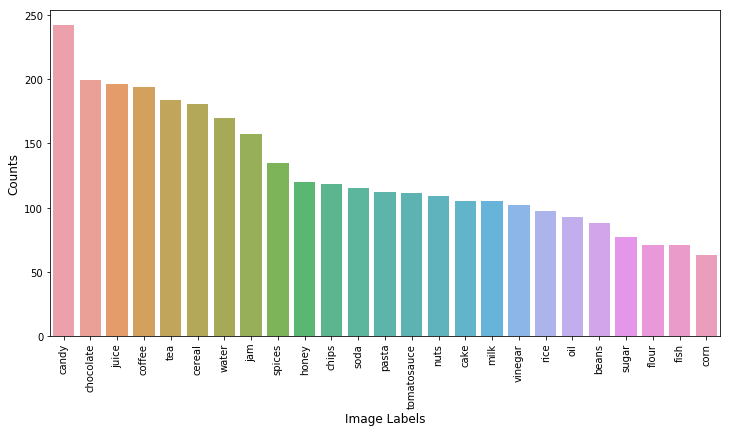

In [3]:
plt.figure(figsize = (12,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Image Labels', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

## Put each training image into a sub folder corresponding to its label after converting to JPG format

In [4]:
for img in tqdm(train.values):
    filename=img[0]
    label=img[1]
    src=os.path.join(data_root,'train_img',filename+'.png')
    label_dir=os.path.join(data_root,'train',label)
    dest=os.path.join(label_dir,filename+'.jpg')
    im=Image.open(src)
    rgb_im=im.convert('RGB')
    if not os.path.exists(label_dir):
        os.makedirs(label_dir)
    rgb_im.save(dest)  
    if not os.path.exists(os.path.join(data_root,'train2',label)):
        os.makedirs(os.path.join(data_root,'train2',label))
    rgb_im.save(os.path.join(data_root,'train2',label,filename+'.jpg'))

100%|██████████| 3215/3215 [01:12<00:00, 44.37it/s]


## Some agile data augmentation (to prevent overfitting) + class balance

In [5]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

class_size=600

src_train_dir=os.path.join(data_root,'train')
dest_train_dir=os.path.join(data_root,'train2')
it=0
for count in label_counts.values:
    #nb of generations per image for this class label in order to make it size ~= class_size
    ratio=math.floor(class_size/count)-1
    print(count,count*(ratio+1))
    dest_lab_dir=os.path.join(dest_train_dir,label_counts.index[it])
    src_lab_dir=os.path.join(src_train_dir,label_counts.index[it])
    if not os.path.exists(dest_lab_dir):
        os.makedirs(dest_lab_dir)
    for file in os.listdir(src_lab_dir):
        img=load_img(os.path.join(src_lab_dir,file))
        #img.save(os.path.join(dest_lab_dir,file))
        x=img_to_array(img) 
        x=x.reshape((1,) + x.shape)
        i=0
        for batch in datagen.flow(x, batch_size=1,save_to_dir=dest_lab_dir, save_format='jpg'):
            i+=1
            if i > ratio:
                break 
    it=it+1

242 484
199 597
196 588
194 582
184 552
181 543
170 510
157 471
135 540
120 600
118 590
115 575
112 560
111 555
109 545
105 525
105 525
102 510
97 582
93 558
88 528
77 539
71 568
71 568
63 567


## Let's check the new distribution

In [7]:
 for dirpath, dirnames, filenames in os.walk(dest_train_dir):
    i=0
    label=''
    for filename in [f for f in filenames if f.endswith(".jpg")]:
        label=os.path.split(dirpath)[1]
        i+=1
    print(label,i)
        

 0
beans 599
cake 608
candy 714
cereal 710
chips 696
chocolate 775
coffee 755
corn 613
fish 628
flour 616
honey 705
jam 619
juice 767
milk 620
nuts 640
oil 636
pasta 657
rice 662
soda 675
spices 656
sugar 605
tea 721
tomatosauce 658
vinegar 602
water 667


In [8]:
print ("===> Retraining with the new data: ")

cmd = 'python retrain.py --image_dir '+dest_train_dir
!{cmd}

===> Retraining with the new data: 
INFO:tensorflow:Looking for images in 'beans'
INFO:tensorflow:Looking for images in 'cake'
INFO:tensorflow:Looking for images in 'candy'
INFO:tensorflow:Looking for images in 'cereal'
INFO:tensorflow:Looking for images in 'chips'
INFO:tensorflow:Looking for images in 'chocolate'
INFO:tensorflow:Looking for images in 'coffee'
INFO:tensorflow:Looking for images in 'corn'
INFO:tensorflow:Looking for images in 'fish'
INFO:tensorflow:Looking for images in 'flour'
INFO:tensorflow:Looking for images in 'honey'
INFO:tensorflow:Looking for images in 'jam'
INFO:tensorflow:Looking for images in 'juice'
INFO:tensorflow:Looking for images in 'milk'
INFO:tensorflow:Looking for images in 'nuts'
INFO:tensorflow:Looking for images in 'oil'
INFO:tensorflow:Looking for images in 'pasta'
INFO:tensorflow:Looking for images in 'rice'
INFO:tensorflow:Looking for images in 'soda'
INFO:tensorflow:Looking for images in 'spices'
INFO:tensorflow:Looking for images in 'sugar'
IN

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_9038.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_9051.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_9066.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_9093.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_9111.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_9229.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_9235.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_9242.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_9244.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_9287.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_9295.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_6727.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_6748.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_6760.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_6816.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_6843.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_6855.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_6856.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_6921.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_6959.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_6962.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_6975.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_4570.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_4639.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_4696.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_4714.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_474.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_4750.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_4759.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_4760.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_4771.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_484.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_4841.jpg_inception_v3.txt
INFO:tensorf

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_2610.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_2632.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_2651.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_2654.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_2665.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_2695.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_2720.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_2736.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_2788.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_2809.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_2821.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_667d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_66b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_679b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_683d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_687a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_708b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_737d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_75b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_768b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_792b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_794d.

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_168d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_220b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_222c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_326d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_387b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_401b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_449b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_485a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_617d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/train_685a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/beans/_0_1391.j

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7739.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7756.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7776.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7797.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_783.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7845.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7866.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_787.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7907.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7911.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7945.jpg_inception_v3.txt
INFO:tensorflow:Creatin

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5646.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5660.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5669.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5674.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5699.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_572.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5771.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5779.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5790.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5791.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5799.jpg_inception_v3.txt
INFO:tensorflow:Creati

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_748.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7482.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7570.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7575.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7593.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7619.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7638.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7655.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7670.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_3457.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_3470.jpg_inception_v3.txt
INFO:tensorflow:Creati

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5509.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5517.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5527.jpg_inception_v3.txt
INFO:tensorflow:900 bottleneck files created.
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_554.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_5540.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_557.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_1255.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_1315.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_1323.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_134.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_1356

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_3250.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_3253.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_3298.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_33.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_3341.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_3374.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_3393.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_342.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/train_103d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/train_111b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/train_117b.jpg_inception_v3.txt
INFO:tensorflow

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/train_783a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/train_8b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_103.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_1074.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_108.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_1133.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_1180.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_1183.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_9854.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_9959.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7809.jpg_inception_v3.txt
INFO:tensorflow:Cre

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_6386.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_6634.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_716.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_7684.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_3769.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_4152.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_4350.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_4400.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_4417.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_4626.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cake/_0_4671.jpg_inception_v3.txt
INFO:tensorflow:Creati

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_8740.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_8756.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_8779.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_8781.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_8799.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_8805.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_8806.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_8817.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_8818.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_8819.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_8822.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_6028.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_6034.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_6053.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_6110.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_6181.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_6183.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_6194.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_6220.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_6273.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_6278.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_6304.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4068.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4095.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4106.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4136.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4141.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4178.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4179.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4227.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4236.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4263.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4278.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1510.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1511.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1530.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1539.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1540.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1590.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_161.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1611.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1618.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1637.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1750.jpg_inception_v3.txt
INFO:tensor

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_578b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_582c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_583c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_588b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_594b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_595d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_599d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_60c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_611c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_612b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_613d

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_209b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_211c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_215d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_216a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_223a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_237d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_239b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_243d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_24b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_262a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_271c

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4005.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4061.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4129.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_4181.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_424.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_45.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_7c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_804b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1101.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1172.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_1431.jpg_inception_v3.txt
INFO:tens

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_2835.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_2854.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/_0_3073.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_475c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_476d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_521d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_529a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_619a.jpg_inception_v3.txt
INFO:tensorflow:1900 bottleneck files created.
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_621a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/candy/train_634a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottlen

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_9214.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_9329.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_933.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_9347.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_9385.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_9411.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_9426.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_9439.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_9442.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_9449.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_9465.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_725.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_7266.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_7268.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_7312.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_7333.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_7354.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_7355.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_738.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_7400.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_7417.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_7419.jpg_inception_v3.txt
I

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_50.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_504.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_5083.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_5103.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_5110.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_5124.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_5149.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_5165.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_5184.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_5199.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_5222.jpg_inception_v3.txt
IN

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_302.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_3060.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_3061.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_3069.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_3077.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_3079.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_3124.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_3136.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_3143.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_3192.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_3198.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1182.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1186.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1195.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_122.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1255.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1278.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1293.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1301.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1328.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1345.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_136.jpg_inception_v3.txt
I

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_431a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_433d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_437c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_437d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_439c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_443c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_446c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_450d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_452b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_467d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cerea

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_750a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_76a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_775b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_775c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_800a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_8d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1181.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1383.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1466.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1578.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1641.jpg_i

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_619d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_62a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_659d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_765a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_788c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/train_792a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1038.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1133.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_131.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1730.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/cereal/_0_1740.jpg_

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_9708.jpg_inception_v3.txt
INFO:tensorflow:2700 bottleneck files created.
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_9742.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_9755.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_9757.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_977.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_9777.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_9804.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_982.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_9821.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_9831.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_7816.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_7825.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_7855.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_7875.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_7879.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_7881.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_7884.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_7896.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_7917.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_7938.jpg_inception_v3.txt
INFO:tensorflow:2800 bottleneck files created.
INFO:tensorflow:Creating bottleneck at /tmp/bottlenec

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_5960.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_5986.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_6015.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_6029.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_603.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_6051.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_612.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_6120.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_6155.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_616.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_6164.jpg_inception_v3.txt
INFO:tensorfl

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_4127.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_4150.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_4165.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_4166.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_417.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_4172.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_4173.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_4190.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_4196.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_4211.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_4226.jpg_inception_v3.txt
INFO:tensor

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_2238.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_2274.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_2328.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_2348.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_2353.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_2354.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_2364.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_2371.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_2388.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_2400.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_2404.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/train_484b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/train_484c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/train_495a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/train_511b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/train_513d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/train_518b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/train_522d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/train_538a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/train_540a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/train_543d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/train_56a

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/train_139a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/train_154c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/train_255d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/train_295a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/train_316b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/train_342c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/train_456a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/train_546a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/train_611b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_8371.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chips/_0_8463.jpg_

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_8988.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_902.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_9027.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_9056.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_9101.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_9110.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_9217.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_9243.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_9244.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_9251.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocol

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_7592.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_7606.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_764.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_7651.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_7679.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_7725.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_7746.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_7755.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_7822.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_7824.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocol

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_5659.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_5674.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_5696.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_5705.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_5722.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_5742.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_5767.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_5774.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_5782.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_5802.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/choco

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_3235.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_3236.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_3323.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_3424.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_3437.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_3468.jpg_inception_v3.txt
INFO:tensorflow:3600 bottleneck files created.
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_3476.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_349.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_3515.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_3539.jpg_inception_v3.txt
INFO:tensorflo

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_1589.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_1612.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_1626.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_1630.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_1643.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_1649.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_165.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_1690.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_1701.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_1709.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocol

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_2927.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_2986.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_3003.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_3009.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_3023.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_3040.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/train_508a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/train_517d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/train_51d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/train_528c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottl

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_1230.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_1236.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_1247.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_1274.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_1275.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_1312.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_1335.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_1343.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_136.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_1376.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocol

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/train_462c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/train_466d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/train_47c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/train_485c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/train_488b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/train_490a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/train_493c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/train_502b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_9048.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_9078.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck a

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/train_43d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/train_465b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_8908.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_922.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_9296.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_9452.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_9694.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_9753.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_7234.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/chocolate/_0_7245.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/c

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_9293.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_9331.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_9388.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_9451.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_9469.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_9496.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_9521.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_9523.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_9525.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_9526.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_9537.jpg_inception_v3.txt

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_820.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_8283.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_8287.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_8289.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_8338.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_8353.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_8357.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_8394.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_8436.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_8441.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_8451.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_6263.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_6317.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_6342.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_6363.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_6372.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_6406.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_6412.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_6416.jpg_inception_v3.txt
INFO:tensorflow:4300 bottleneck files created.
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_6419.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_6442.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_430.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_4301.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_4322.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_4334.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_4407.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_4416.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_4452.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_4499.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_4507.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_4587.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_4591.jpg_inception_v3.txt


INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_2200.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_2204.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_2232.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_2258.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_2265.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_2288.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_2317.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_2353.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_237.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_240.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_2433.jpg_inception_v3.txt
I

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/train_688c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/train_690c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/train_693b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/train_699a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/train_705c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/train_712a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/train_713c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/train_718a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/train_730d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/train_734a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffe

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/train_231c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/train_232a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/train_232c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/train_236a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/train_238a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/train_244a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/train_247d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/train_248b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/train_258c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/train_26d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_6790.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_702.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_7089.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_3483.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_3525.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_3668.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_3993.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_4551.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_4714.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_517.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_5428.jpg_inception_v3.txt
I

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_1527.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_1693.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_1977.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_2027.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_2140.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_2259.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_2556.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_2656.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_2837.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_2896.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/coffee/_0_3061.jpg_inception_v3.txt

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_8315.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_8320.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_8345.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_8347.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_8415.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_8421.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_8483.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_8489.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_8500.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_8508.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_8512.jpg_inception_v3.txt
INFO:tensorflow:Creat

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_6595.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_660.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_6602.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_6605.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_6613.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_6614.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_6637.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_6692.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_6707.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_6722.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_6725.jpg_inception_v3.txt
INFO:tensorflow:Creati

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_4913.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_4952.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_4973.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_4978.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_4981.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_5015.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_5018.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_5024.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_5027.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_5045.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_5127.jpg_inception_v3.txt
INFO:tensorflow:Creat

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_278.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_2803.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_2810.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_2847.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_2852.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_2853.jpg_inception_v3.txt
INFO:tensorflow:5200 bottleneck files created.
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_2893.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_2934.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_2940.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_2982.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_2

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/train_618b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/train_63c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/train_644b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/train_649a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/train_666c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/train_668a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/train_669a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/train_698d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/train_700a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/train_737b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/train_779c.jpg_incept

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_5021.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_524.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_550.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_5509.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_186.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_2147.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_23.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_251.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_2701.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_2877.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_3432.jpg_inception_v3.txt
INFO:tensorflow:Creating bo

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/corn/_0_182.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_9525.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_9530.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_9543.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_9564.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_9578.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_9597.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_9621.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_9625.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_9656.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_9670.jpg_inception_v3.txt
INFO:tensorflow:Creati

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_9029.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_9037.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_9038.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_904.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_910.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_9101.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_9104.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_9106.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_9109.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_9134.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_9140.jpg_inception_v3.txt
INFO:tensorflow:Creatin

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_7356.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_7414.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_7428.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_7445.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_7492.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_7505.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_7527.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_7535.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_7538.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_7553.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_7564.jpg_inception_v3.txt
INFO:tensorflow:Creat

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_5052.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_5064.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_5073.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_5074.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_5108.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_5109.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_5158.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_5165.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_5166.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_5168.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_5172.jpg_inception_v3.txt
INFO:tensorflow:Creat

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_2906.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_2910.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_2923.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_2953.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_3015.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_3033.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_3038.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_3041.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_3097.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_3101.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_3142.jpg_inception_v3.txt
INFO:tensorflow:Creat

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/train_73b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/train_784c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/train_794c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/train_799a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/train_97d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_1020.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_1041.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_1051.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_1072.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_1150.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_1189.jpg_inception_v3.txt
INFO:ten

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_2005.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_2021.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_2415.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_2476.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_2673.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_2916.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_3426.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/_0_3554.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/train_168c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/train_301d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/fish/train_421a.jpg_inception_v3.txt
INFO:tensorf

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_9887.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_989.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_9891.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_9912.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_992.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_9951.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_9964.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_9965.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_9973.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_9977.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_9981.jpg_inception_v3.txt
INFO:tensorf

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_9227.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_9245.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_9274.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_9278.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_9292.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_9298.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_9302.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_9309.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_9311.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_9315.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_9321.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_7352.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_7366.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_738.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_741.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_7411.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_7430.jpg_inception_v3.txt
INFO:tensorflow:6300 bottleneck files created.
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_7431.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_7437.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_7540.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_7577.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_5269.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_5285.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_5308.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_5340.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_5403.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_5434.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_5443.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_5445.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_5471.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_5500.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_5502.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_2984.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_3030.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_3133.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_3147.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_3268.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_3271.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_3332.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_3341.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_3352.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_3379.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_3387.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_1057.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_1074.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_1101.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_1105.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_1166.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_1179.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_1185.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_1219.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_1269.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_1344.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_1381.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_8064.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_8129.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_8341.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_8361.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_8734.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_9566.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_5754.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_6426.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_6573.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_6631.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/flour/_0_6684.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_8717.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_8728.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_874.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_8770.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_8781.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_879.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_8790.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_8802.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_8809.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_881.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_8819.jpg_inception_v3.txt
INFO:tensorfl

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_6986.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_7030.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_7047.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_7051.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_7077.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_7091.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_7114.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_7117.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_7119.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_7169.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_7178.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_4896.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_4912.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_4918.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_4922.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_4963.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_500.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_5008.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_5049.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_5063.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_5071.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_5114.jpg_inception_v3.txt
INFO:tensor

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_2899.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_2922.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_2934.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_2937.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_2956.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_2958.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_2966.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_3033.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_3046.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_3053.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_3058.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_1156.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_1178.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_1193.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_1195.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_1207.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_121.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_1220.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_1269.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_129.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_1298.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_1324.jpg_inception_v3.txt
INFO:tensorf

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/train_124c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/train_138a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/train_13d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/train_140a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/train_140d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/train_157d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/train_174a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/train_178a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/train_188c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/train_196a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/train_19d.

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_8679.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_9078.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_9323.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_9384.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_9865.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_9931.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_6869.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_7042.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_7373.jpg_inception_v3.txt
INFO:tensorflow:7300 bottleneck files created.
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_7437.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottlenec

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_5809.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_5945.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_6133.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_6230.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_6273.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_2744.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_2752.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_2824.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_2914.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_2963.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/honey/_0_3251.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_7338.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_7349.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_7389.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_739.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_7423.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_7428.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_7447.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_7451.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_7483.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_7489.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_7500.jpg_inception_v3.txt
INFO:tensorflow:Creating bottlene

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_4551.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_4559.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_4581.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_4593.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_4613.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_4623.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_4640.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_4644.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_4688.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_4711.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_477.jpg_inception_v3.txt
INFO:tensorflow:Creating bottlene

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_2359.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_2389.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_2413.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_2417.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_2433.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_244.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_2456.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_2461.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_2530.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_2573.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_2579.jpg_inception_v3.txt
INFO:tensorflow:Creating bottlene

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_69a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_705b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_706d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_708c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_709c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_710b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_712b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_71a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_725c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_730c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_743c.jpg_inception_v3.txt
I

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_147c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_151c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_153c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_154b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_159a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_15d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_165a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_167b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_169b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_16d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_189a.jpg_inception_v3.txt
I

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_7642.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_7835.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_8065.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_8199.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_8908.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_4243.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_4562.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_4770.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_4922.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_5025.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/_0_5075.jpg_inception_v3.txt
INFO:tensorflow:Creating bottlen

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_237b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_298d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_335a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_354c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_367d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_383d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_433b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_507a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_523c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_574d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/jam/train_598a.jpg_inception_v3.txt

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_7926.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_7927.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_7930.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_7946.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_796.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_7984.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_8004.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_8005.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_8006.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_8026.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_8037.jpg_inception_v3.txt
INFO:tensor

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_6023.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_6077.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_608.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_6155.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_6163.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_6209.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_6227.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_625.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_6259.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_6267.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_6273.jpg_inception_v3.txt
INFO:tensorf

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_3745.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_3746.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_3778.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_3797.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_38.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_3848.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_3859.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_3923.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_3945.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_3950.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_3999.jpg_inception_v3.txt
INFO:tensorf

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_1736.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_1745.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_1749.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_176.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_1783.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_1800.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_1830.jpg_inception_v3.txt
INFO:tensorflow:8400 bottleneck files created.
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_1836.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_1847.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_1878.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/train_576a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/train_577a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/train_584b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/train_592c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/train_599a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/train_5c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/train_601b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/train_601d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/train_603d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/train_607a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/train_610d.

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/train_182a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/train_183a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/train_193d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/train_198a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/train_200c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/train_203a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/train_204b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/train_206a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/train_207b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/train_209a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/train_219

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_5709.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_5818.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_5902.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_6217.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_6331.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_6486.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_6620.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_6716.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_6809.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_6861.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_3158.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_6636.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_6700.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_6909.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_6942.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_7108.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_7326.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_3346.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_3896.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_4370.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_4375.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/juice/_0_4781.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_7537.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_7562.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_7570.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_7588.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_7646.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_7647.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_7649.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_7703.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_7844.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_787.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_7943.jpg_inception_v3.txt
INFO:tensorflow:Creati

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_5324.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_5371.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_5405.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_5411.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_5421.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_5430.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_5432.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_5450.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_5456.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_5488.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_5504.jpg_inception_v3.txt
INFO:tensorflow:Creat

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_3207.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_321.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_3214.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_3215.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_3219.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_3254.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_3272.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_328.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_3317.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_3327.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_3355.jpg_inception_v3.txt
INFO:tensorflow:Creatin

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_1152.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_1190.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_1211.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_1213.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_1224.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_1240.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_1264.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_1307.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_1313.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_1346.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_1363.jpg_inception_v3.txt
INFO:tensorflow:Creat

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/train_114b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/train_11c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/train_137a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/train_143a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/train_150d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/train_157a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/train_174c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/train_178b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/train_193b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/train_200a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/train_203c.jpg_incept

INFO:tensorflow:9300 bottleneck files created.
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_9356.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_9385.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_9550.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_9880.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_7302.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_7441.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_76.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_7641.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_7781.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_8062.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_86

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_7060.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_7121.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_3396.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_3755.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_387.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_3984.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_4472.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_4631.jpg_inception_v3.txt
INFO:tensorflow:9400 bottleneck files created.
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_4853.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_4948.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/milk/_0_1

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_7598.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_7638.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_7657.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_767.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_7678.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_7734.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_7738.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_7766.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_7772.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_7899.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_7905.jpg_inception_v3.txt
INFO:tensorflow:Creati

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_5533.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_5542.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_5565.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_5575.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_5600.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_564.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_5640.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_5644.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_5648.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_5652.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_5659.jpg_inception_v3.txt
INFO:tensorflow:Creati

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_3262.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_3267.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_3312.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_3324.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_3368.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_3369.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_3378.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_3425.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_3438.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_3503.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_3505.jpg_inception_v3.txt
INFO:tensorflow:Creat

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_1159.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_1178.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_1179.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_1223.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_1226.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_1236.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_1251.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_1261.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_1267.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_1283.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_1307.jpg_inception_v3.txt
INFO:tensorflow:Creat

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/train_203b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/train_227c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/train_229d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/train_232b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/train_23a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/train_244c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/train_24a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/train_259b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/train_267c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/train_294a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/train_298c.jpg_incepti

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_7384.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_7478.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_7687.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_7763.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_7791.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_783.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_7841.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_8042.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_8231.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_8365.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_8389.jpg_inception_v3.txt
INFO:tensorflow:Creati

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_696.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_7001.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_722.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_2960.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_3105.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_3289.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_3290.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_3296.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_3567.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_3754.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/nuts/_0_3767.jpg_inception_v3.txt
INFO:tensorflow:Creatin

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_7698.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_7725.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_7727.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_7756.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_777.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_7794.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_7810.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_7862.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_7924.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_7936.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_7959.jpg_inception_v3.txt
INFO:tensorflow:Creating bottlene

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_5404.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_5446.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_5454.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_5477.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_5489.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_5495.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_5503.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_5558.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_557.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_5575.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_5583.jpg_inception_v3.txt
INFO:tensorflow:Creating bottlene

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_3310.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_3349.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_3357.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_3378.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_3434.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_3444.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_3498.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_3525.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_3532.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_3540.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_3553.jpg_inception_v3.txt
INFO:tensorflow:Creating bottlen

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_1412.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_1418.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_1447.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_1454.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_1474.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_1498.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_1506.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_1550.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_1563.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_1593.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_1599.jpg_inception_v3.txt
INFO:tensorflow:Creating bottlen

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/train_164a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/train_185a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/train_199c.jpg_inception_v3.txt
INFO:tensorflow:10500 bottleneck files created.
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/train_226b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/train_22c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/train_255c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/train_256a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/train_260c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/train_261a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/train_262b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_2488.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_2533.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_2757.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_2840.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/_0_300.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/train_149c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/train_161a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/train_180c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/train_195d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/train_263b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/oil/train_277a.jpg_inception_v3.txt
INFO:tensorflow

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_7143.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_7145.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_7147.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_7248.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_7276.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_7287.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_7329.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_7330.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_736.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_7369.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_7376.jpg_inception_v3.txt
INFO:tensor

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_5259.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_53.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_5300.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_5338.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_535.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_5359.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_5374.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_5405.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_5410.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_5422.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_5432.jpg_inception_v3.txt
INFO:tensorfl

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_3261.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_3263.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_3268.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_328.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_3312.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_3323.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_3345.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_3367.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_3378.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_3379.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_3392.jpg_inception_v3.txt
INFO:tensor

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_1436.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_1450.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_1451.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_1454.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_1467.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_1481.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_1482.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_1487.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_149.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_1520.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_1531.jpg_inception_v3.txt
INFO:tensor

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/train_173b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/train_180a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/train_194d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/train_210d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/train_217d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/train_252c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/train_257d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/train_269c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/train_277d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/train_279b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/train_285

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_9470.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_9580.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_9614.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_9654.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_9697.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_9734.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_7152.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_7342.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_7518.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_7523.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_7749.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_8754.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_8843.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_4956.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_4990.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_507.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_5100.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_5174.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_5504.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_5528.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_5594.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/pasta/_0_5645.jpg_inception_v3.txt
INFO:tensor

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_97.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_9721.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_9807.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_9843.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_9857.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_9875.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_9895.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_9903.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_9908.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_9928.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_9934.jpg_inception_v3.txt
INFO:tensorflow:Creatin

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_643.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_6458.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_6483.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_6492.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_6507.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_6513.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_6542.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_6559.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_6561.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_6587.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_6592.jpg_inception_v3.txt
INFO:tensorflow:11600 

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_444.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_4459.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_4467.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_4505.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_4622.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_4638.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_4648.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_4651.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_4667.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_4690.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_4707.jpg_inception_v3.txt
INFO:tensorflow:Creati

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_2663.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_2673.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_2674.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_2685.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_2706.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_2715.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_2721.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_2731.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_2755.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_2762.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_2783.jpg_inception_v3.txt
INFO:tensorflow:Creat

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/train_620a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/train_621c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/train_631a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/train_631d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/train_643b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/train_647a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/train_648b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/train_64a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/train_65a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/train_662d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/train_675a.jpg_incepti

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/train_519d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/train_52a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/train_624c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/train_642d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/train_720c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/train_754d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/train_8c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_113.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_1192.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_128.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/rice/_0_8637.jpg_inception_v3.txt
INFO:

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_9035.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_9039.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_9056.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_9057.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_9058.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_9062.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_9076.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_914.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_9268.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_9273.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_9282.jpg_inception_v3.txt
INFO:tensorflow:Creati

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_7641.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_7652.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_7660.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_7749.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_7759.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_776.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_7801.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_7834.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_7845.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_7862.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_7864.jpg_inception_v3.txt
INFO:tensorflow:Creati

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_5804.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_5813.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_5814.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_5848.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_5852.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_5854.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_5882.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_5903.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_5905.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_5939.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_5943.jpg_inception_v3.txt
INFO:tensorflow:Creat

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_365.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_3657.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_3677.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_3678.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_3708.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_3786.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_3803.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_3806.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_3815.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_3835.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_3837.jpg_inception_v3.txt
INFO:tensorflow:Creati

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_1655.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_1668.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_1675.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_1699.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_1765.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_1772.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_1806.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_1844.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_1848.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_186.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_1862.jpg_inception_v3.txt
INFO:tensorflow:Creati

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_4456.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_4479.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_4584.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_459.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_1115.jpg_inception_v3.txt
INFO:tensorflow:12600 bottleneck files created.
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_1205.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_1698.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_1849.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_1940.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_2014.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/_0_

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/train_510d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/train_564a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/train_60d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/train_636c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/train_675b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/train_709a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/train_731a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/soda/train_758b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_8766.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_8796.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_8825.jpg_inception

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_7200.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_7218.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_7230.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_7304.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_7307.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_7321.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_7342.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_7357.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_7364.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_7384.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_7408.jpg_inception_v3.txt

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_5017.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_5018.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_5034.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_5049.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_5077.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_5113.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_5151.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_5223.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_5247.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_5313.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_5316.jpg_inception_v3.txt

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_3152.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_3165.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_3176.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_3192.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_3203.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_3216.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_3267.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_3289.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_3315.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_3320.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_3329.jpg_inception_v3.txt

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/train_788d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/train_799c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/train_80b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/train_88d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/train_92a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/train_9d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_1054.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_1068.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_1083.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_1095.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_1105.jpg_inc

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/train_194b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/train_198d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/train_213d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/train_218a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/train_228c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/train_254b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/train_265b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/train_265c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/train_269a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/train_275a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spice

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_9070.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_9279.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_929.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_9336.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_9356.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_694.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_7118.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_7239.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_7267.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_7325.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_7681.jpg_inception_v3.txt
I

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_3575.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_3627.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_3746.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_3950.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_4022.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_4417.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/_0_451.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/train_744b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/train_749b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/train_77a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/spices/train_803d.jpg_incept

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_8678.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_8680.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_8698.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_8719.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_8725.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_8732.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_8749.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_8768.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_8831.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_8840.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_8868.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_6565.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_6582.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_6659.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_6724.jpg_inception_v3.txt
INFO:tensorflow:13500 bottleneck files created.
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_6772.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_6777.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_6807.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_6810.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_684.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_6855.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottlenec

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_4510.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_453.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_4572.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_4624.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_4625.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_4632.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_4641.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_4646.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_4665.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_4682.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_469.jpg_inception_v3.txt
INFO:tensorf

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_2566.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_2567.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_2584.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_2599.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_2603.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_2655.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_2680.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_2689.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_2710.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_2749.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_2796.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/train_503a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/train_515c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/train_519b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/train_521a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/train_54d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/train_552b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/train_555a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/train_560a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/train_564b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/train_567c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/train_581c

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_398.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_4045.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_4072.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_4451.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_4770.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_4852.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_5075.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_5253.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_5441.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_545.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/_0_1761.jpg_inception_v3.txt
INFO:tensorf

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/train_328c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/train_343d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/train_374c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/train_419d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/train_472a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/train_477b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/sugar/train_637a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_9649.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_9653.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_9692.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_9693.jpg_inception_v3.t

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_9155.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_9178.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_9181.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_9214.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_9222.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_9233.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_9250.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_9256.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_9277.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_9300.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_933.jpg_inception_v3.txt
INFO:tensorflow:Creating bottlene

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_7272.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_728.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_7306.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_7307.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_7355.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_7473.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_7478.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_7515.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_7572.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_7580.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_759.jpg_inception_v3.txt
INFO:tensorflow:Creating bottlenec

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_5266.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_5283.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_5316.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_5352.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_5436.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_5475.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_5488.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_5491.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_5503.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_5515.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_5522.jpg_inception_v3.txt
INFO:tensorflow:Creating bottlen

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_318.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_3190.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_3205.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_3245.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_3265.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_3305.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_3309.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_331.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_3316.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_3321.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_338.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_1309.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_1319.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_1329.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_144.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_1441.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_1455.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_1473.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_1482.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_154.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_1579.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_1598.jpg_inception_v3.txt
INFO:tensorflow:Creating bottlenec

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/train_440a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/train_445b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/train_445c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/train_449d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/train_453a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/train_454b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/train_457a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/train_457b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/train_458b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/train_470d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/train_481a.jpg_inception_v3.txt

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_7760.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_780.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_7895.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_8020.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_8049.jpg_inception_v3.txt
INFO:tensorflow:14600 bottleneck files created.
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_805.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_8056.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_9150.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_9279.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_9391.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tea/_0_949.jpg_ince

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_9076.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_9112.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_9117.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_9162.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_9204.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_9238.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_9269.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_9276.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_9277.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_9315.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_7757.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_7763.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_7768.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_7781.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_7812.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_7839.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_7845.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_7849.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_7880.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_7906.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_5452.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_5455.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_5457.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_5504.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_552.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_5564.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_557.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_5624.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_5715.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_5755.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tm

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_3450.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_3469.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_3473.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_3508.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_3525.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_3535.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_3551.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_3552.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_3563.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_3569.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_1358.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_138.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_1382.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_1399.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_1421.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_1428.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_146.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_1488.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_1509.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_1559.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tm

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/train_132d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/train_146d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/train_14a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/train_14d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/train_156d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/train_158b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/train_160a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/train_166b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/train_179d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/train_186b.jpg_inception_v3.txt
INFO:tensorf

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/train_86d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_0.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_1000.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_1022.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_9248.jpg_inception_v3.txt
INFO:tensorflow:15200 bottleneck files created.
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_9371.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_95.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_9696.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_9750.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_9951.jpg_inception_v3

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_4894.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_4928.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_4977.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_5.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_5023.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_507.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_5458.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_6134.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_6155.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/tomatosauce/_0_6496.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_7868.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_7881.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_7914.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_7943.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_7957.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_7958.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_7981.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_804.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_8061.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_8093.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_811.jpg_incepti

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_562.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_5674.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_5696.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_5704.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_5721.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_5731.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_5818.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_5834.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_5853.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_5878.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_5883.jpg_incept

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_7406.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_7432.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_744.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_3225.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_3275.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_3298.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_3311.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_3316.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_3400.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_3425.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_3434.jpg_incept

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_5362.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_5399.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_541.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_5423.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_5461.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_5478.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_5488.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_1212.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_1238.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_1240.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_1241.jpg_incept

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_2923.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_2952.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_2992.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_3019.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_3031.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_3050.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_3051.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_3085.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_3109.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_3117.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_3124.jpg_incep

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/train_750c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/train_756c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/train_779b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/train_788a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/train_800d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/train_81c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/train_87c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_1028.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_1032.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_104.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_3693.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_4059.jpg_inception_v3.txt
INFO:tensorflow:15900 bottleneck files created.
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_4065.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_413.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_4149.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_4435.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_4444.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_4610.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_4645.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/vinegar/_0_475.jpg_inception_v3.txt
INFO:tensorflow:Creating bottlenec

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_9712.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_9767.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_978.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_9784.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_9859.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_9906.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_9920.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_9931.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_994.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_9971.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_9975.jpg_inception_v3.txt
INFO:tensorf

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_7962.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_8017.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_8025.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_8027.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_8050.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_8052.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_8111.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_8117.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_8131.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_8212.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_8214.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_5749.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_5773.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_5862.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_5912.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_5925.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_5932.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_5959.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_597.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_5971.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_60.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_600.jpg_inception_v3.txt
INFO:tensorflo

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_3380.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_3479.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_3498.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_3521.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_3538.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_3543.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_3553.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_3572.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_3575.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_3635.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_3646.jpg_inception_v3.txt
INFO:tenso

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_1061.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_1124.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_1155.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_1159.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_121.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_1240.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_1247.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_1255.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_1321.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_1359.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_1366.jpg_inception_v3.txt
INFO:tensor

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/train_417c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/train_422c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/train_424c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/train_43a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/train_440b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/train_443d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/train_447c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/train_449c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/train_456c.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/train_459b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/train_459d

INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_1348.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_1414.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_1526.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_1589.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_1865.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/_0_1890.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/train_110d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/train_148d.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/train_183b.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/train_360a.jpg_inception_v3.txt
INFO:tensorflow:Creating bottleneck at /tmp/bottleneck/water/train_375a.jpg_inception_v3

INFO:tensorflow:2018-07-03 20:22:39.250373: Step 40: Train accuracy = 23.0%
INFO:tensorflow:2018-07-03 20:22:39.250596: Step 40: Cross entropy = 2.942079
INFO:tensorflow:2018-07-03 20:22:39.344191: Step 40: Validation accuracy = 26.0% (N=100)
INFO:tensorflow:2018-07-03 20:22:40.255868: Step 50: Train accuracy = 42.0%
INFO:tensorflow:2018-07-03 20:22:40.256169: Step 50: Cross entropy = 2.880639
INFO:tensorflow:2018-07-03 20:22:40.352700: Step 50: Validation accuracy = 28.0% (N=100)
INFO:tensorflow:2018-07-03 20:22:41.268838: Step 60: Train accuracy = 39.0%
INFO:tensorflow:2018-07-03 20:22:41.269094: Step 60: Cross entropy = 2.845626
INFO:tensorflow:2018-07-03 20:22:41.381424: Step 60: Validation accuracy = 34.0% (N=100)
INFO:tensorflow:2018-07-03 20:22:42.441179: Step 70: Train accuracy = 37.0%
INFO:tensorflow:2018-07-03 20:22:42.441453: Step 70: Cross entropy = 2.770053
INFO:tensorflow:2018-07-03 20:22:42.539007: Step 70: Validation accuracy = 25.0% (N=100)
INFO:tensorflow:2018-07-03 2

INFO:tensorflow:2018-07-03 20:23:15.441553: Step 370: Validation accuracy = 54.0% (N=100)
INFO:tensorflow:2018-07-03 20:23:16.423807: Step 380: Train accuracy = 59.0%
INFO:tensorflow:2018-07-03 20:23:16.424032: Step 380: Cross entropy = 1.882594
INFO:tensorflow:2018-07-03 20:23:16.515079: Step 380: Validation accuracy = 45.0% (N=100)
INFO:tensorflow:2018-07-03 20:23:17.474694: Step 390: Train accuracy = 53.0%
INFO:tensorflow:2018-07-03 20:23:17.474969: Step 390: Cross entropy = 1.838670
INFO:tensorflow:2018-07-03 20:23:17.569472: Step 390: Validation accuracy = 47.0% (N=100)
INFO:tensorflow:2018-07-03 20:23:18.611058: Step 400: Train accuracy = 54.0%
INFO:tensorflow:2018-07-03 20:23:18.611282: Step 400: Cross entropy = 1.878662
INFO:tensorflow:2018-07-03 20:23:18.706000: Step 400: Validation accuracy = 54.0% (N=100)
INFO:tensorflow:2018-07-03 20:23:19.805344: Step 410: Train accuracy = 61.0%
INFO:tensorflow:2018-07-03 20:23:19.805562: Step 410: Cross entropy = 1.825640
INFO:tensorflow:

INFO:tensorflow:2018-07-03 20:23:53.531356: Step 710: Train accuracy = 59.0%
INFO:tensorflow:2018-07-03 20:23:53.531606: Step 710: Cross entropy = 1.745214
INFO:tensorflow:2018-07-03 20:23:53.623360: Step 710: Validation accuracy = 62.0% (N=100)
INFO:tensorflow:2018-07-03 20:23:54.602019: Step 720: Train accuracy = 59.0%
INFO:tensorflow:2018-07-03 20:23:54.602232: Step 720: Cross entropy = 1.693718
INFO:tensorflow:2018-07-03 20:23:54.719263: Step 720: Validation accuracy = 56.0% (N=100)
INFO:tensorflow:2018-07-03 20:23:55.909971: Step 730: Train accuracy = 61.0%
INFO:tensorflow:2018-07-03 20:23:55.910196: Step 730: Cross entropy = 1.687829
INFO:tensorflow:2018-07-03 20:23:56.187582: Step 730: Validation accuracy = 54.0% (N=100)
INFO:tensorflow:2018-07-03 20:23:57.872475: Step 740: Train accuracy = 67.0%
INFO:tensorflow:2018-07-03 20:23:57.872711: Step 740: Cross entropy = 1.469802
INFO:tensorflow:2018-07-03 20:23:57.988323: Step 740: Validation accuracy = 53.0% (N=100)
INFO:tensorflow:

INFO:tensorflow:2018-07-03 20:24:32.796392: Step 1040: Validation accuracy = 61.0% (N=100)
INFO:tensorflow:2018-07-03 20:24:33.713691: Step 1050: Train accuracy = 67.0%
INFO:tensorflow:2018-07-03 20:24:33.713909: Step 1050: Cross entropy = 1.364423
INFO:tensorflow:2018-07-03 20:24:33.804281: Step 1050: Validation accuracy = 64.0% (N=100)
INFO:tensorflow:2018-07-03 20:24:34.983847: Step 1060: Train accuracy = 63.0%
INFO:tensorflow:2018-07-03 20:24:34.984061: Step 1060: Cross entropy = 1.413424
INFO:tensorflow:2018-07-03 20:24:35.079686: Step 1060: Validation accuracy = 57.0% (N=100)
INFO:tensorflow:2018-07-03 20:24:36.135749: Step 1070: Train accuracy = 68.0%
INFO:tensorflow:2018-07-03 20:24:36.136048: Step 1070: Cross entropy = 1.467124
INFO:tensorflow:2018-07-03 20:24:36.245352: Step 1070: Validation accuracy = 62.0% (N=100)
INFO:tensorflow:2018-07-03 20:24:37.207528: Step 1080: Train accuracy = 70.0%
INFO:tensorflow:2018-07-03 20:24:37.207859: Step 1080: Cross entropy = 1.393244
INFO

INFO:tensorflow:2018-07-03 20:25:07.454725: Step 1370: Validation accuracy = 59.0% (N=100)
INFO:tensorflow:2018-07-03 20:25:08.351965: Step 1380: Train accuracy = 66.0%
INFO:tensorflow:2018-07-03 20:25:08.352248: Step 1380: Cross entropy = 1.301812
INFO:tensorflow:2018-07-03 20:25:08.446874: Step 1380: Validation accuracy = 67.0% (N=100)
INFO:tensorflow:2018-07-03 20:25:09.412814: Step 1390: Train accuracy = 64.0%
INFO:tensorflow:2018-07-03 20:25:09.413138: Step 1390: Cross entropy = 1.396019
INFO:tensorflow:2018-07-03 20:25:09.510830: Step 1390: Validation accuracy = 56.0% (N=100)
INFO:tensorflow:2018-07-03 20:25:10.414631: Step 1400: Train accuracy = 73.0%
INFO:tensorflow:2018-07-03 20:25:10.414907: Step 1400: Cross entropy = 1.256966
INFO:tensorflow:2018-07-03 20:25:10.504415: Step 1400: Validation accuracy = 58.0% (N=100)
INFO:tensorflow:2018-07-03 20:25:11.431362: Step 1410: Train accuracy = 69.0%
INFO:tensorflow:2018-07-03 20:25:11.431851: Step 1410: Cross entropy = 1.326056
INFO

INFO:tensorflow:2018-07-03 20:25:41.303738: Step 1700: Validation accuracy = 63.0% (N=100)
INFO:tensorflow:2018-07-03 20:25:42.234456: Step 1710: Train accuracy = 73.0%
INFO:tensorflow:2018-07-03 20:25:42.234733: Step 1710: Cross entropy = 1.221318
INFO:tensorflow:2018-07-03 20:25:42.330539: Step 1710: Validation accuracy = 63.0% (N=100)
INFO:tensorflow:2018-07-03 20:25:43.250481: Step 1720: Train accuracy = 68.0%
INFO:tensorflow:2018-07-03 20:25:43.250703: Step 1720: Cross entropy = 1.253113
INFO:tensorflow:2018-07-03 20:25:43.356734: Step 1720: Validation accuracy = 73.0% (N=100)
INFO:tensorflow:2018-07-03 20:25:44.350069: Step 1730: Train accuracy = 65.0%
INFO:tensorflow:2018-07-03 20:25:44.350353: Step 1730: Cross entropy = 1.296573
INFO:tensorflow:2018-07-03 20:25:44.444759: Step 1730: Validation accuracy = 58.0% (N=100)
INFO:tensorflow:2018-07-03 20:25:45.335006: Step 1740: Train accuracy = 75.0%
INFO:tensorflow:2018-07-03 20:25:45.335296: Step 1740: Cross entropy = 1.209640
INFO

INFO:tensorflow:2018-07-03 20:26:15.271013: Step 2030: Validation accuracy = 64.0% (N=100)
INFO:tensorflow:2018-07-03 20:26:16.274965: Step 2040: Train accuracy = 81.0%
INFO:tensorflow:2018-07-03 20:26:16.275183: Step 2040: Cross entropy = 0.945431
INFO:tensorflow:2018-07-03 20:26:16.364872: Step 2040: Validation accuracy = 62.0% (N=100)
INFO:tensorflow:2018-07-03 20:26:17.375994: Step 2050: Train accuracy = 73.0%
INFO:tensorflow:2018-07-03 20:26:17.376259: Step 2050: Cross entropy = 1.005498
INFO:tensorflow:2018-07-03 20:26:17.473555: Step 2050: Validation accuracy = 64.0% (N=100)
INFO:tensorflow:2018-07-03 20:26:18.388844: Step 2060: Train accuracy = 69.0%
INFO:tensorflow:2018-07-03 20:26:18.389088: Step 2060: Cross entropy = 1.270167
INFO:tensorflow:2018-07-03 20:26:18.478547: Step 2060: Validation accuracy = 71.0% (N=100)
INFO:tensorflow:2018-07-03 20:26:19.396388: Step 2070: Train accuracy = 62.0%
INFO:tensorflow:2018-07-03 20:26:19.396672: Step 2070: Cross entropy = 1.271874
INFO

INFO:tensorflow:2018-07-03 20:26:52.308050: Step 2360: Validation accuracy = 68.0% (N=100)
INFO:tensorflow:2018-07-03 20:26:53.365787: Step 2370: Train accuracy = 77.0%
INFO:tensorflow:2018-07-03 20:26:53.366087: Step 2370: Cross entropy = 0.991132
INFO:tensorflow:2018-07-03 20:26:53.471832: Step 2370: Validation accuracy = 75.0% (N=100)
INFO:tensorflow:2018-07-03 20:26:54.881902: Step 2380: Train accuracy = 65.0%
INFO:tensorflow:2018-07-03 20:26:54.882194: Step 2380: Cross entropy = 1.237316
INFO:tensorflow:2018-07-03 20:26:54.984807: Step 2380: Validation accuracy = 67.0% (N=100)
INFO:tensorflow:2018-07-03 20:26:56.077363: Step 2390: Train accuracy = 71.0%
INFO:tensorflow:2018-07-03 20:26:56.077653: Step 2390: Cross entropy = 1.061061
INFO:tensorflow:2018-07-03 20:26:56.195727: Step 2390: Validation accuracy = 60.0% (N=100)
INFO:tensorflow:2018-07-03 20:26:57.309077: Step 2400: Train accuracy = 76.0%
INFO:tensorflow:2018-07-03 20:26:57.309302: Step 2400: Cross entropy = 0.995531
INFO

INFO:tensorflow:2018-07-03 20:27:31.061182: Step 2690: Validation accuracy = 72.0% (N=100)
INFO:tensorflow:2018-07-03 20:27:32.073728: Step 2700: Train accuracy = 71.0%
INFO:tensorflow:2018-07-03 20:27:32.073938: Step 2700: Cross entropy = 1.093765
INFO:tensorflow:2018-07-03 20:27:32.178152: Step 2700: Validation accuracy = 72.0% (N=100)
INFO:tensorflow:2018-07-03 20:27:33.167424: Step 2710: Train accuracy = 78.0%
INFO:tensorflow:2018-07-03 20:27:33.167650: Step 2710: Cross entropy = 1.055317
INFO:tensorflow:2018-07-03 20:27:33.261699: Step 2710: Validation accuracy = 63.0% (N=100)
INFO:tensorflow:2018-07-03 20:27:34.197806: Step 2720: Train accuracy = 76.0%
INFO:tensorflow:2018-07-03 20:27:34.198443: Step 2720: Cross entropy = 1.011492
INFO:tensorflow:2018-07-03 20:27:34.293786: Step 2720: Validation accuracy = 65.0% (N=100)
INFO:tensorflow:2018-07-03 20:27:35.224020: Step 2730: Train accuracy = 71.0%
INFO:tensorflow:2018-07-03 20:27:35.224235: Step 2730: Cross entropy = 1.082880
INFO

INFO:tensorflow:2018-07-03 20:28:05.689693: Step 3020: Validation accuracy = 72.0% (N=100)
INFO:tensorflow:2018-07-03 20:28:06.599620: Step 3030: Train accuracy = 72.0%
INFO:tensorflow:2018-07-03 20:28:06.599838: Step 3030: Cross entropy = 1.017289
INFO:tensorflow:2018-07-03 20:28:06.692830: Step 3030: Validation accuracy = 71.0% (N=100)
INFO:tensorflow:2018-07-03 20:28:07.722475: Step 3040: Train accuracy = 78.0%
INFO:tensorflow:2018-07-03 20:28:07.722701: Step 3040: Cross entropy = 0.942257
INFO:tensorflow:2018-07-03 20:28:07.820273: Step 3040: Validation accuracy = 74.0% (N=100)
INFO:tensorflow:2018-07-03 20:28:08.779052: Step 3050: Train accuracy = 76.0%
INFO:tensorflow:2018-07-03 20:28:08.779339: Step 3050: Cross entropy = 1.007215
INFO:tensorflow:2018-07-03 20:28:08.875742: Step 3050: Validation accuracy = 57.0% (N=100)
INFO:tensorflow:2018-07-03 20:28:09.784345: Step 3060: Train accuracy = 78.0%
INFO:tensorflow:2018-07-03 20:28:09.784562: Step 3060: Cross entropy = 0.983106
INFO

INFO:tensorflow:2018-07-03 20:28:42.701051: Step 3350: Validation accuracy = 70.0% (N=100)
INFO:tensorflow:2018-07-03 20:28:43.677580: Step 3360: Train accuracy = 75.0%
INFO:tensorflow:2018-07-03 20:28:43.677808: Step 3360: Cross entropy = 1.050682
INFO:tensorflow:2018-07-03 20:28:43.769104: Step 3360: Validation accuracy = 70.0% (N=100)
INFO:tensorflow:2018-07-03 20:28:44.803861: Step 3370: Train accuracy = 72.0%
INFO:tensorflow:2018-07-03 20:28:44.804171: Step 3370: Cross entropy = 1.230624
INFO:tensorflow:2018-07-03 20:28:44.984891: Step 3370: Validation accuracy = 65.0% (N=100)
INFO:tensorflow:2018-07-03 20:28:46.128126: Step 3380: Train accuracy = 74.0%
INFO:tensorflow:2018-07-03 20:28:46.128375: Step 3380: Cross entropy = 0.984312
INFO:tensorflow:2018-07-03 20:28:46.234013: Step 3380: Validation accuracy = 69.0% (N=100)
INFO:tensorflow:2018-07-03 20:28:47.192206: Step 3390: Train accuracy = 83.0%
INFO:tensorflow:2018-07-03 20:28:47.192437: Step 3390: Cross entropy = 0.744844
INFO

INFO:tensorflow:2018-07-03 20:29:19.717253: Step 3680: Validation accuracy = 68.0% (N=100)
INFO:tensorflow:2018-07-03 20:29:20.685651: Step 3690: Train accuracy = 70.0%
INFO:tensorflow:2018-07-03 20:29:20.685952: Step 3690: Cross entropy = 0.987210
INFO:tensorflow:2018-07-03 20:29:20.784113: Step 3690: Validation accuracy = 73.0% (N=100)
INFO:tensorflow:2018-07-03 20:29:21.762202: Step 3700: Train accuracy = 76.0%
INFO:tensorflow:2018-07-03 20:29:21.762437: Step 3700: Cross entropy = 0.857204
INFO:tensorflow:2018-07-03 20:29:21.863807: Step 3700: Validation accuracy = 69.0% (N=100)
INFO:tensorflow:2018-07-03 20:29:22.864743: Step 3710: Train accuracy = 78.0%
INFO:tensorflow:2018-07-03 20:29:22.864987: Step 3710: Cross entropy = 1.017601
INFO:tensorflow:2018-07-03 20:29:22.991176: Step 3710: Validation accuracy = 70.0% (N=100)
INFO:tensorflow:2018-07-03 20:29:24.073810: Step 3720: Train accuracy = 75.0%
INFO:tensorflow:2018-07-03 20:29:24.074055: Step 3720: Cross entropy = 0.957570
INFO

In [ ]:
print ("===> Tensorboard Results visualization at http://localhost:6066")

print("====> Tensorboard url:  http://localhost:6006")

cmd = "tensorboard --logdir /tmp/retrain_logs"
!{cmd}

print("http://localhost:6066")

===> Tensorboard Results visualization at http://localhost:6066
====> Tensorboard url:  http://localhost:6006
TensorBoard 1.7.0 at http://ae932d4bb166:6006 (Press CTRL+C to quit)
